# "Credit Card Lead Prediction - EDA"
> "This project delves into the EDA of Credit Card Lead Prediction dataset. The problem is to predict if an existing customer of a mid-sized Bank is likely to purchase their Credit Card."

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [project, machine-learning, notebook, python]
- image: images/vignette/eda.jpg
- hide: false
- search_exclude: false

<div style="padding:10px; background:#71DFE7; color:black; text-align:center; border-radius: 30px">
    <h1>Problem Statement</h1>
</div>

**Credit Card Lead Prediction**

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings. The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

Now, the bank is looking for your help to understand various patterns among the data that might be useful in identifying customers that could show higher intent towards a recommended credit card, given:
1. Customer details (gender, age, region etc.)
2. Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

<div style="padding:10px; background:#71DFE7; color:black; text-align:center; border-radius: 30px">
    <h1>Imports and Display Options</h1>
</div>

In [1]:
# Imports
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

# Set output display options
warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.3f}'.format

<div style="padding:10px; background:#71DFE7; color:black; text-align:center; border-radius: 30px">
    <h1>Data Eyeballing</h1>
</div>

In [2]:
# Load data and drop ID column
data_dir = Path('./data')
df = pd.read_csv(data_dir / 'train.csv')
df.drop('ID', axis=1, inplace=True)

# Convert Is_Lead column into categorical variable
df['Is_Lead'] = df['Is_Lead'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Gender               245725 non-null  object  
 1   Age                  245725 non-null  int64   
 2   Region_Code          245725 non-null  object  
 3   Occupation           245725 non-null  object  
 4   Channel_Code         245725 non-null  object  
 5   Vintage              245725 non-null  int64   
 6   Credit_Product       216400 non-null  object  
 7   Avg_Account_Balance  245725 non-null  int64   
 8   Is_Active            245725 non-null  object  
 9   Is_Lead              245725 non-null  category
dtypes: category(1), int64(3), object(6)
memory usage: 17.1+ MB


In [3]:
df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
# Categorical cols
cat_cols = df.select_dtypes(include=['category', 'object']).columns

# Numerical cols
num_cols = df.select_dtypes(include=['int64']).columns
print(f'''
    {len(cat_cols)}-Categorical Columns: {cat_cols.tolist()},
    {len(num_cols)}-Numerical Columns: {num_cols.tolist()}
    ''')


    7-Categorical Columns: ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active', 'Is_Lead'],
    3-Numerical Columns: ['Age', 'Vintage', 'Avg_Account_Balance']
    


In [5]:
# Check for missing values
df.isnull().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [6]:
print(f'{df.isnull().sum().sum() / df.shape[0] * 100: .3f}%\
    values in \'Credit_Product\' are missing')


 11.934%    values in 'Credit_Product' are missing


In [7]:
print(df['Vintage'].nunique(), f'Unique values in \'Vintage\'',
      df['Age'].nunique(), f'Unique values in \'Age\'')

66 Unique values in 'Vintage' 63 Unique values in 'Age'


In [8]:
# Descriptive statistics for numerical columns
df.describe()

,Age,Vintage,Avg_Account_Balance
count,245725.000,245725.000,245725.000
mean,43.856,46.959,1128403.101
std,14.829,32.353,852936.356
min,23.000,7.000,20790.000
25%,30.000,20.000,604310.000
50%,43.000,32.000,894601.000
75%,54.000,73.000,1366666.000
max,85.000,135.000,10352009.000


In [9]:
# Descriptive statistics for categorical columns
df.describe(include=['O', 'category'])

,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active,Is_Lead
count,245725,245725,245725,245725,216400,245725,245725
unique,2,35,4,4,2,2,2
top,Male,RG268,Self_Employed,X1,No,No,0
freq,134197,35934,100886,103718,144357,150290,187437


<div style="padding:10px; background:#71DFE7; color:black; text-align:center; border-radius: 30px">
    <h1>Univariate Analysis</h1>
</div>

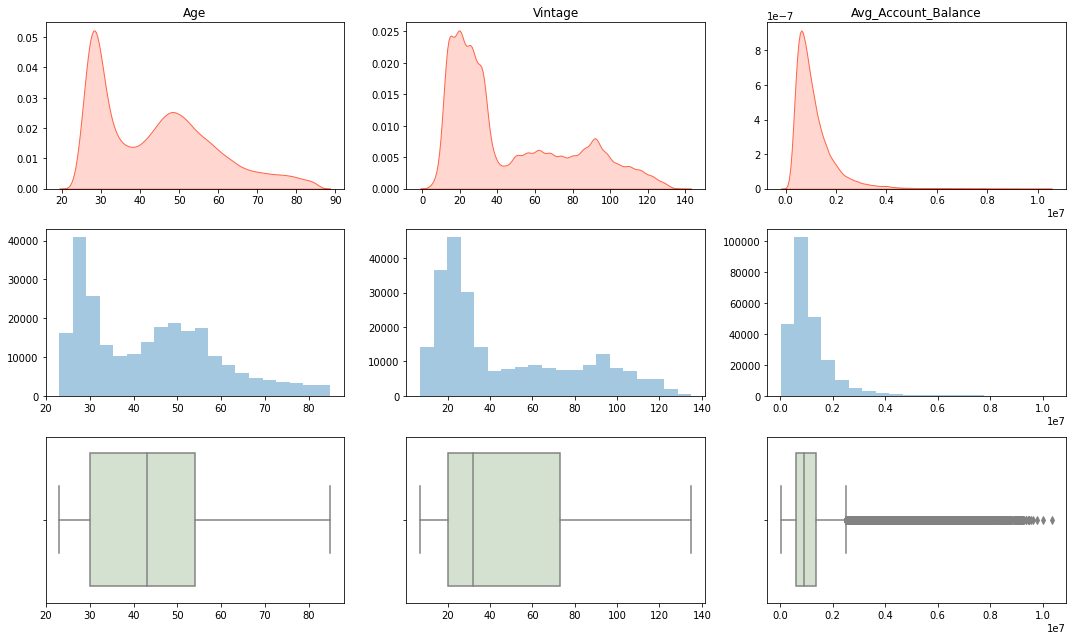

In [56]:
# Plot KDE Plots for all numerical columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 9))
for i, col in enumerate(num_cols):
    sns.kdeplot(df[col], shade=True, label=col, ax=axes[0, i], color='Tomato')
    sns.distplot(df[col], hist=True, kde=False, label=col, bins=20, ax=axes[1, i])
    sns.boxplot(x=col, data=df, ax=axes[2, i], color='#D3E4CD')

    # set title and remove x-axis labels
    axes[0, i].set_xlabel("")
    axes[1, i].set_xlabel("")
    axes[2, i].set_xlabel("")
    axes[0, i].set_ylabel("")
    axes[0, i].set_title(col)
plt.tight_layout()

We can use **log-transform** to make the distribution of 'Avg_Account_Balance' more normal, as it approximately follows a log-normal distribution.

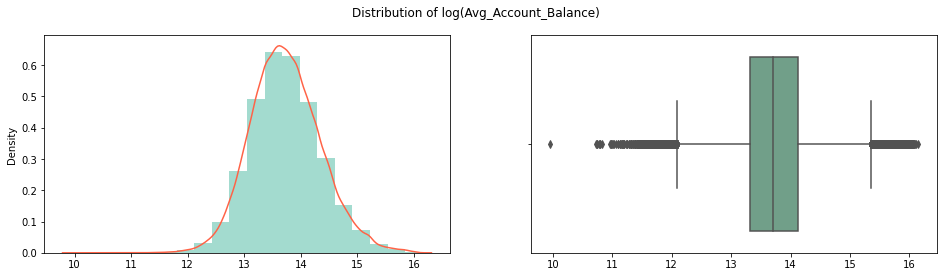

In [18]:
# Using log transformation to normalize the 'Avg_Account_Balance'
log_aab = np.log(df['Avg_Account_Balance'])
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
fig.suptitle('Distribution of log(Avg_Account_Balance)')
sns.distplot(log_aab, label='log(Avg_Account_Balance)',
            kde=True, hist=True, bins=20, color='#19A789', ax=axes[0], kde_kws={'color': 'Tomato'})
sns.boxplot(x=log_aab, ax=axes[1], color='#69A789')
axes[0].set_xlabel("")
axes[1].set_xlabel("")
plt.show()

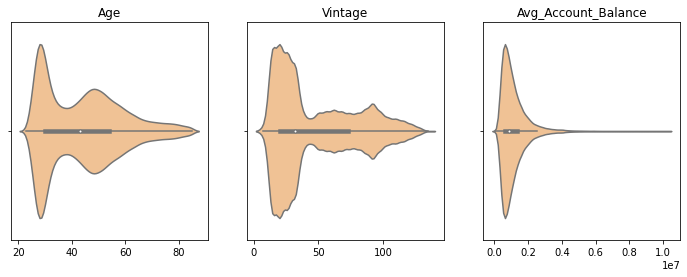

In [58]:
# Plot Violen plot for all numerical columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, col in enumerate(num_cols):
    sns.violinplot(x=col, data=df, ax=axes[i], color='#FFC286')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].set_title(col)

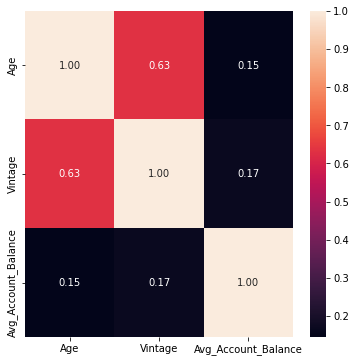

In [24]:
# Plot correlation matrix for all numerical columns
corr = df[num_cols].corr()
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr, annot=True, fmt='.2f', ax=ax)
plt.show()

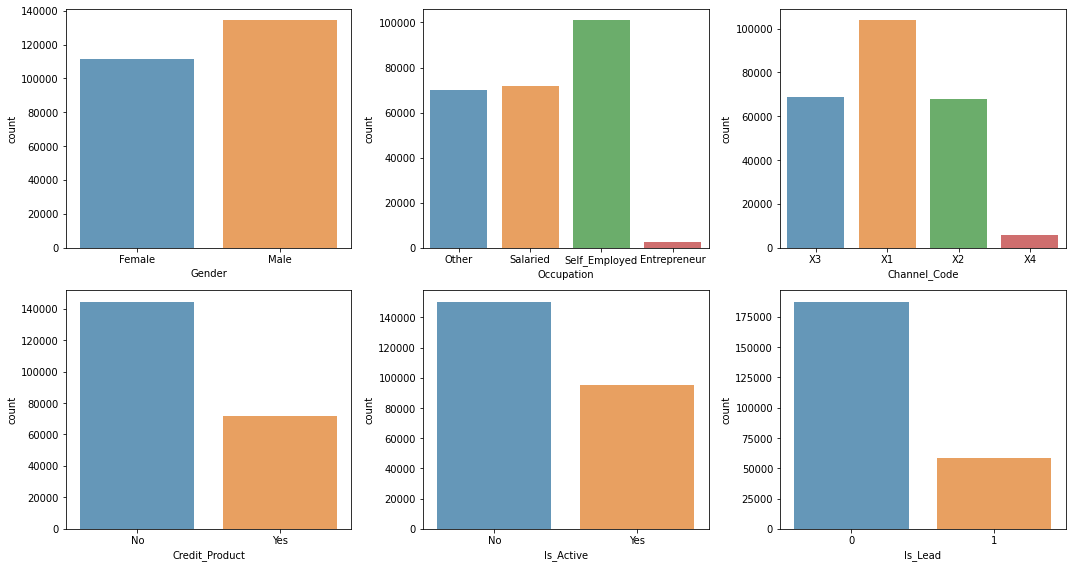

In [60]:
# Plot catplot() for all categorical columns
cat_feats = list(cat_cols)
cat_feats.remove('Region_Code')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
for i, col in enumerate(cat_feats):
    sns.countplot(df[col], ax=axes[int(i // 3), i%3], alpha=0.75)
plt.tight_layout()

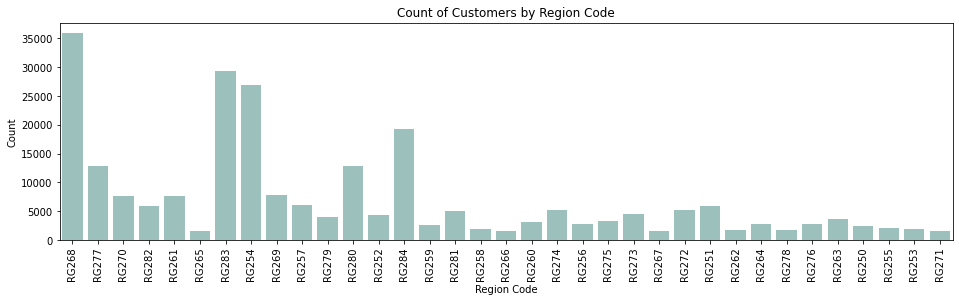

In [61]:
# Plot countplot for 'Region_Code' and align vertically
plt.figure(figsize=(16, 4))
sns.countplot(x='Region_Code', data=df, color='#96C7C1')
plt.xticks(rotation=90)
plt.xlabel('Region Code')
plt.ylabel('Count')
plt.title('Count of Customers by Region Code')
plt.show()

<div style="padding:10px; background:#71DFE7; color:black; text-align:center; border-radius: 30px">
    <h1>Bivariate Analysis</h1>
</div>

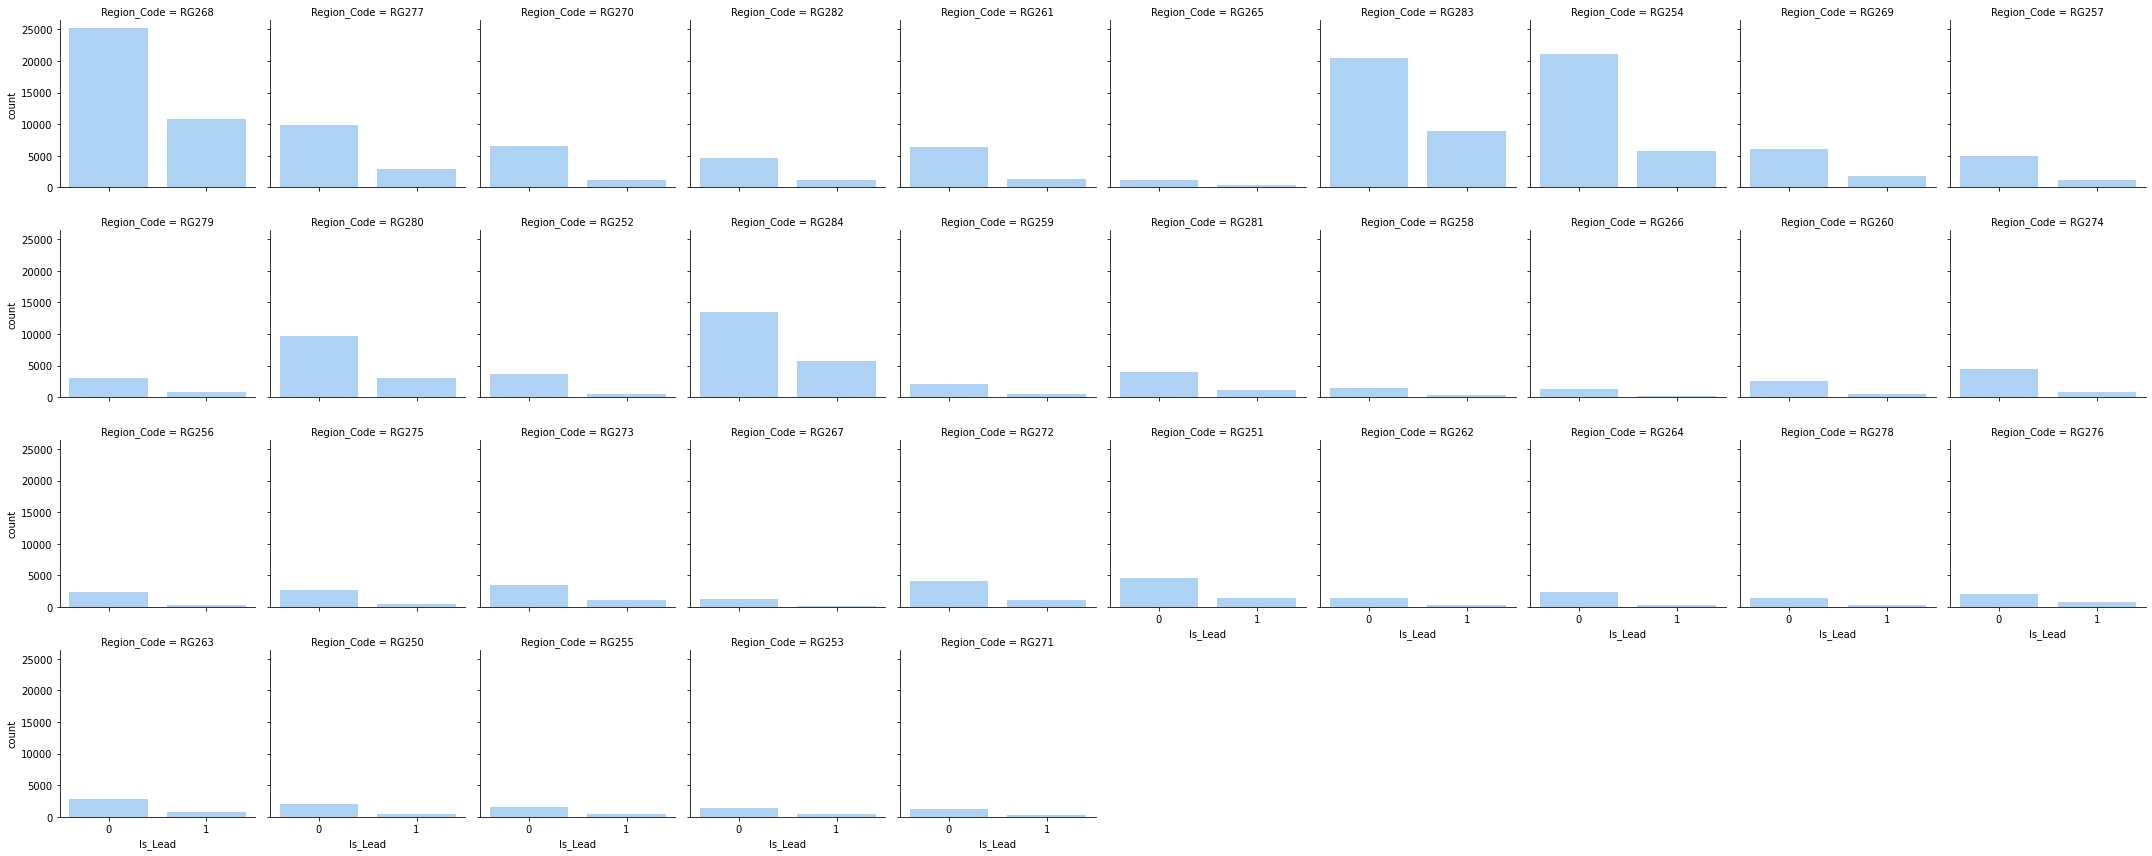

In [62]:
# Plot count of Leads by Region Code
g = sns.FacetGrid(df, col='Region_Code', col_wrap=10)
g.map(sns.countplot, 'Is_Lead', color='#A2D2FF')
plt.show()

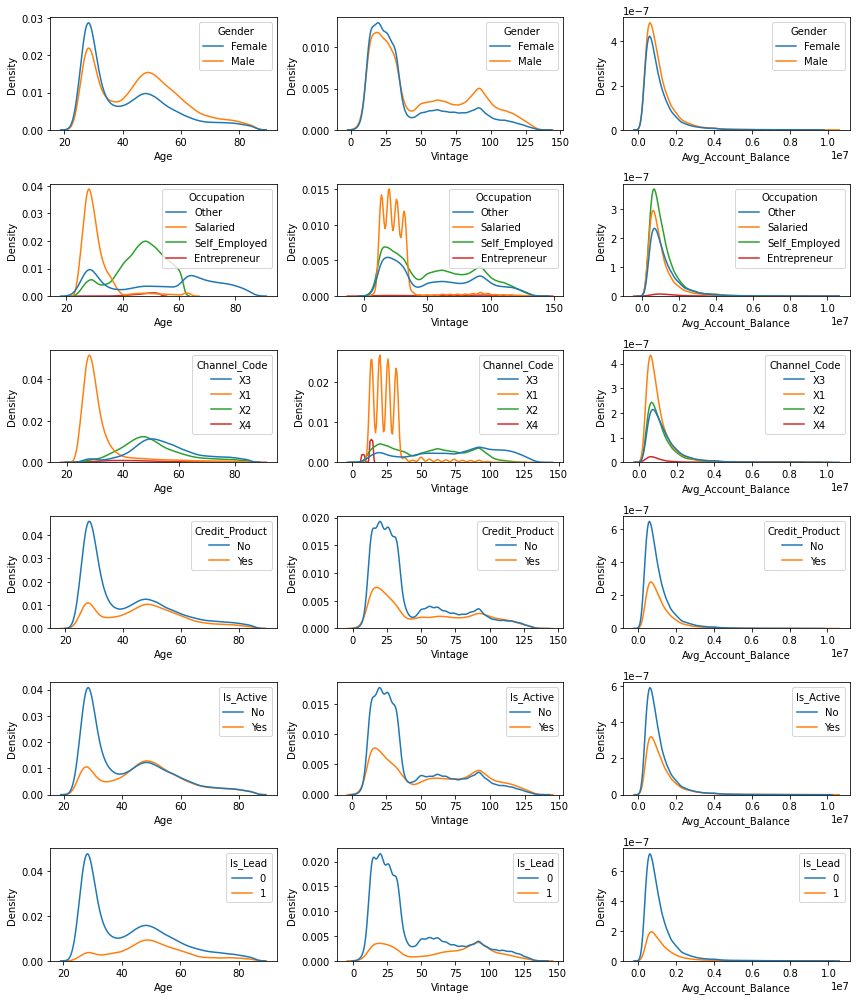

In [63]:
# Plot KDE Plots for all numerical columns with hue=cat_col
fig, axes = plt.subplots(nrows=len(cat_feats), ncols=3, figsize=(12, len(cat_cols)*2))
for i, cat_col in enumerate(cat_feats):
    for j, num_col in enumerate(num_cols):
        sns.kdeplot(x = num_col, data=df, hue=cat_col, label=col, ax=axes[i, j])
plt.tight_layout()

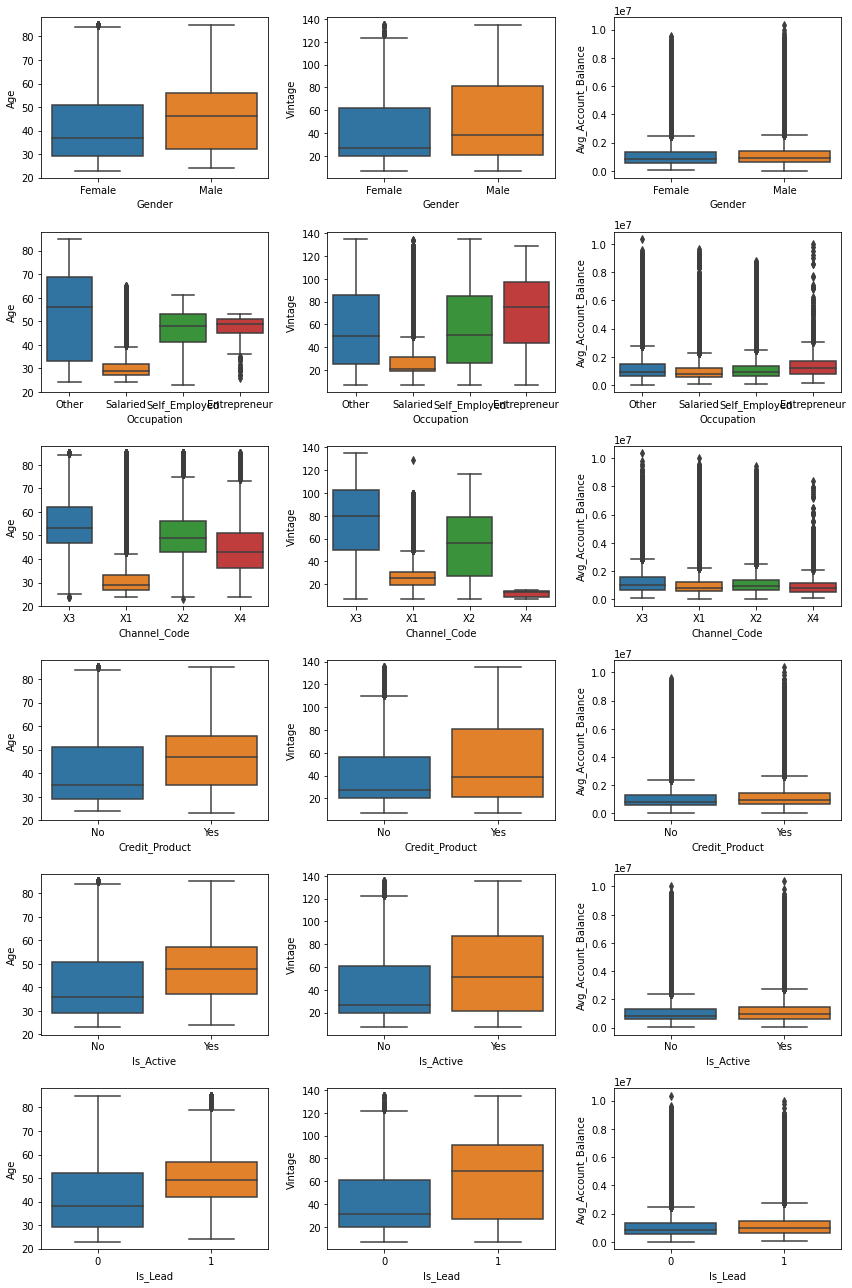

In [64]:
# Plot Box-Plot for all numerical columns with hue=cat_col
fig, axes = plt.subplots(nrows=len(cat_feats), ncols=3, figsize=(12, 3*len(cat_feats)))
for i, cat_col in enumerate(cat_feats):
    for j, num_col in enumerate(num_cols):
        sns.boxplot(y=num_col, x=cat_col, data=df, ax=axes[i,j])
plt.tight_layout()

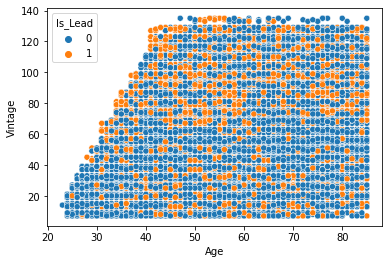

In [26]:
# Plot Scatter-Plot between Age and Vintage
sns.scatterplot(x='Age', y='Vintage', data=df, hue='Is_Lead')
plt.show()

<div style="padding:10px; background:#71DFE7; color:black; text-align:center; border-radius: 30px">
    <h1>Relationship b/w Missing Values and Target</h1>
</div>

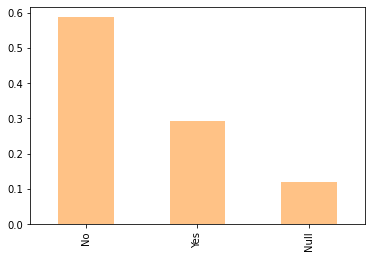

In [75]:
# Fraction of customers with missing values who are leads
df['Credit_Product'][df['Credit_Product'].isnull()] = 'Null'
df['Credit_Product'].value_counts(normalize=True).plot(kind='bar', color='#FFC286')
plt.show()

In [76]:
df.groupby('Credit_Product')['Is_Lead'].value_counts(normalize=True)

Credit_Product   
No              0    0.926412
                1    0.073588
Null            1    0.851662
                0    0.148338
Yes             0    0.685049
                1    0.314951
Name: Is_Lead, dtype: float64

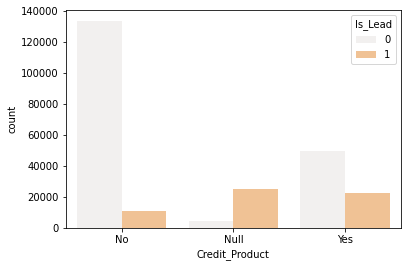

In [77]:
sns.countplot(x='Credit_Product', data=df, hue='Is_Lead', color='#FFC286')
plt.show()

<div style="padding:10px; background:#71DFE7; color:black; text-align:center; border-radius: 30px">
    <h1>Calculate Feature Importance using Mutual Information</h1>
</div>

In [79]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder, RobustScaler

cat_cols = cat_cols.tolist()
cat_cols.remove('Is_Lead')

# Scale the numerical columns
scaler = RobustScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Encode categorical columns
encoder = OrdinalEncoder()
df[cat_cols] = encoder.fit_transform(df[cat_cols])

# Get the target variable
target = df.pop('Is_Lead')

# Get the indices of the categorical features
cols = df.columns.tolist()
cat_idx = [i for i in range(len(cols)) if cols[i] in cat_cols]

# Calculate Mutual Information
mi = mutual_info_classif(df, target, discrete_features=cat_idx)
mi_df = pd.DataFrame(mi, index=df.columns, columns=['MI'])
mi_df = mi_df.sort_values(by='MI', ascending=False)
mi_df.head()

,MI
Credit_Product,0.160682
Age,0.051525
Channel_Code,0.047878
Vintage,0.047105
Occupation,0.011373


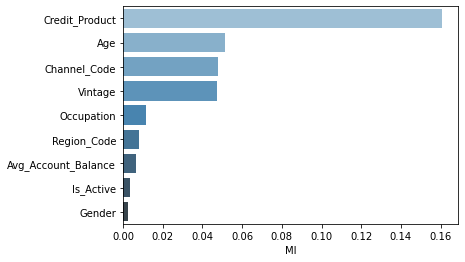

In [80]:
# Plot MI from mi_df
sns.barplot(x='MI', y=mi_df.index, data=mi_df.head(10), palette='Blues_d')
plt.show()